# Amino Acid Decode Prep

This notebook documents steps taken to create a set of keys for converting amino acid one letter codes to a larger set of information to be used by the CNN. 

Data references:

Nelson, David L.; Cox, Michael M. (2000). Lehninger Principles of Biochemistry (3rd ed.). Worth Publishers. ISBN 978-1-57259-153-0.

Kyte J, Doolittle RF (May 1982). "A simple method for displaying the hydropathic character of a protein". Journal of Molecular Biology. 157 (1): 105–32. CiteSeerX 10.1.1.458.454. doi:10.1016/0022-2836(82)90515-0. PMID 7108955.

Meierhenrich, Uwe J. (2008). Amino acids and the asymmetry of life (1st ed.). Springer. ISBN 978-3-540-76885-2.

Biochemistry, Harpers (2015). Harpers Illustrated Biochemistry (30st ed.). Lange. ISBN 978-0-07-182534-4.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_r = pd.read_csv('AA_info.csv')
data_r.head()

,Name,One Letter,Three Letter,mass,PI,pka,pkb,side chain,hydrophobic,pka.1,polar,ph,small,tiny,aromatic or aliphatic,van der waal volume,Hydrophobicity
0,Alanine,A,Ala,89.09404,6.01,2.35,9.87,-CH3,Yes,30.00,No,NaN,Yes,Yes,Aliphatic,67,0.33
1,Arginine,R,Arg,174.20274,10.76,1.82,8.99,-(CH2)3NH-C(NH)NH2,No,12.30,Yes,strongly basic,No,No,-,148,1.00
2,Asparagine,N,Asn,132.11904,5.41,2.14,8.72,-CH2CONH2,No,30.00,Yes,NaN,Yes,No,-,96,0.43
3,Aspartic acid,D,Asp,133.10384,2.85,1.99,9.90,-CH2COOH,No,3.67,Yes,acidic,Yes,No,-,91,2.66
4,Cysteine,C,Cys,121.15404,5.05,1.92,10.70,-CH2SH,Yes,8.55,No,acidic,Yes,Yes,-,86,0.22


In [3]:
data_r.columns

Index(['Name', 'One Letter', 'Three Letter', 'mass', 'PI', 'pka', 'pkb',
       'side chain', 'hydrophobic', 'pka.1', 'polar', 'ph', 'small', 'tiny',
       'aromatic or aliphatic', 'van der waal volume', 'Hydrophobicity'],
      dtype='object')

In [4]:
data_r.index = data_r['One Letter']
data_r.drop(['O', 'U'], inplace=True)

Numeric columns taken as is and scaled with standard scaler. Note that for pka.1, some amino acids do not have reported vlues. They are given a value of 30, which is consistent with their side chains expected to have significantly higher pka's than the ones with reported values.

In [5]:
data = data_r[['mass', 'PI', 'pka', 'pkb','pka.1','van der waal volume', 'Hydrophobicity']]
data.index = data_r['One Letter']

In [6]:
data

,mass,PI,pka,pkb,pka.1,van der waal volume,Hydrophobicity
One Letter,,,,,,,
A,89.09404,6.01,2.35,9.87,30.00,67,0.33
R,174.20274,10.76,1.82,8.99,12.30,148,1.00
N,132.11904,5.41,2.14,8.72,30.00,96,0.43
D,133.10384,2.85,1.99,9.90,3.67,91,2.66
C,121.15404,5.05,1.92,10.70,8.55,86,0.22
Q,146.14594,5.65,2.17,9.13,30.00,114,0.19
E,147.13074,3.15,2.10,9.47,4.25,109,1.67
G,75.06714,6.06,2.35,9.78,30.00,48,1.14
H,155.15634,7.60,1.80,9.33,6.54,118,1.34


In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [8]:
ss = MinMaxScaler()
data = pd.DataFrame(ss.fit_transform(data), columns=data.columns, index=data.index)

In [9]:
data

,mass,PI,pka,pkb,pka.1,van der waal volume,Hydrophobicity
One Letter,,,,,,,
A,0.108600,0.399494,0.833333,0.580808,1.000000,0.165217,0.328530
R,0.767533,1.000000,0.030303,0.136364,0.327763,0.869565,0.521614
N,0.441710,0.323641,0.515152,0.000000,1.000000,0.417391,0.357349
D,0.449335,0.000000,0.287879,0.595960,0.000000,0.373913,1.000000
C,0.356817,0.278129,0.181818,1.000000,0.185340,0.330435,0.296830
Q,0.550310,0.353982,0.560606,0.207071,1.000000,0.573913,0.288184
E,0.557935,0.037927,0.454545,0.378788,0.022028,0.530435,0.714697
G,0.000000,0.405815,0.833333,0.535354,1.000000,0.000000,0.561960
H,0.620071,0.600506,0.000000,0.308081,0.109001,0.608696,0.619597


Boolean type columns are converted to 1,0 columns

In [10]:
# Hydrophobic is simple yes or no
for col in ['hydrophobic', 'polar']:
    data[col] = pd.get_dummies(data_r[col])['Yes']

In [11]:
all(data['hydrophobic'] != data['polar'])

True

In [12]:
# dropping polar as it is an inverse of hydrophobic
data.drop('polar', axis=1, inplace=True)

In [13]:
# Aromatic/Aliphatic are each yes or no, '-' is a 0 for both
data = pd.concat((data, pd.get_dummies(data_r['aromatic or aliphatic'])[['Aliphatic', 'Aromatic']]), axis=1)

In [14]:
data

,mass,PI,pka,pkb,pka.1,van der waal volume,Hydrophobicity,hydrophobic,Aliphatic,Aromatic
One Letter,,,,,,,,,,
A,0.108600,0.399494,0.833333,0.580808,1.000000,0.165217,0.328530,1,1,0
R,0.767533,1.000000,0.030303,0.136364,0.327763,0.869565,0.521614,0,0,0
N,0.441710,0.323641,0.515152,0.000000,1.000000,0.417391,0.357349,0,0,0
D,0.449335,0.000000,0.287879,0.595960,0.000000,0.373913,1.000000,0,0,0
C,0.356817,0.278129,0.181818,1.000000,0.185340,0.330435,0.296830,1,0,0
Q,0.550310,0.353982,0.560606,0.207071,1.000000,0.573913,0.288184,0,0,0
E,0.557935,0.037927,0.454545,0.378788,0.022028,0.530435,0.714697,0,0,0
G,0.000000,0.405815,0.833333,0.535354,1.000000,0.000000,0.561960,1,0,0
H,0.620071,0.600506,0.000000,0.308081,0.109001,0.608696,0.619597,0,0,1


The ph column can be converted to an ordinal as 'basic' and 'acidic' represent two ends of a scale.

In [15]:
ordinal = []
for i in data_r['ph']:
    if i == 'acidic':
        ordinal.append(-2)
    elif i == 'weak acidic':
        ordinal.append(-1)
    elif i == 'weak basic':
        ordinal.append(1)
    elif i == 'basic':
        ordinal.append(2)
    elif i == 'strongly basic':
        ordinal.append(3)
    else:
        ordinal.append(0)
data['ph'] = ordinal

In [16]:
pd.concat((data['ph'], data_r['ph']), axis=1)

,ph,ph
One Letter,,
A,0,NaN
R,3,strongly basic
N,0,NaN
D,-2,acidic
C,-2,acidic
Q,0,NaN
E,-2,acidic
G,0,NaN
H,1,weak basic


Finally, the amino acids contain much more information not captured in the above columns. Their one letter codes are encoded in dummy variables for the CNN to have the opportunity to 'learn' more information from these.

In [17]:
letters = pd.DataFrame(data=pd.get_dummies(data_r.index))
letters.index = data_r.index
letters

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
One Letter,,,,,,,,,,,,,,,,,,,,
A,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
R,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
N,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
D,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Q,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
E,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
G,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
H,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
for c in letters.columns:
    if letters[c][letters[c] == 1].name != c:
        print(c)

In [19]:
data = pd.concat((data, letters), axis=1)

In [20]:
data

,mass,PI,pka,pkb,pka.1,van der waal volume,Hydrophobicity,hydrophobic,Aliphatic,Aromatic,...,M,N,P,Q,R,S,T,V,W,Y
One Letter,,,,,,,,,,,,,,,,,,,,,
A,0.108600,0.399494,0.833333,0.580808,1.000000,0.165217,0.328530,1,1,0,...,0,0,0,0,0,0,0,0,0,0
R,0.767533,1.000000,0.030303,0.136364,0.327763,0.869565,0.521614,0,0,0,...,0,0,0,0,1,0,0,0,0,0
N,0.441710,0.323641,0.515152,0.000000,1.000000,0.417391,0.357349,0,0,0,...,0,1,0,0,0,0,0,0,0,0
D,0.449335,0.000000,0.287879,0.595960,0.000000,0.373913,1.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C,0.356817,0.278129,0.181818,1.000000,0.185340,0.330435,0.296830,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Q,0.550310,0.353982,0.560606,0.207071,1.000000,0.573913,0.288184,0,0,0,...,0,0,0,1,0,0,0,0,0,0
E,0.557935,0.037927,0.454545,0.378788,0.022028,0.530435,0.714697,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G,0.000000,0.405815,0.833333,0.535354,1.000000,0.000000,0.561960,1,0,0,...,0,0,0,0,0,0,0,0,0,0
H,0.620071,0.600506,0.000000,0.308081,0.109001,0.608696,0.619597,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
data.shape

(20, 31)

In [1]:
data.to_csv('AA_keys.csv')

NameError: name 'data' is not defined

# Visualizations for write-up

In [2]:
import os
os.chdir('..')
from seq2mat import DataGenerator, seq_class, label_dict, aa_keys, aa_to_map

In [3]:
import numpy as np

In [4]:
params = {
        'batch_size': 128, 
        'dim': (1502, 31),
        'n_classes': 25, 
        'shuffle': True,
        'struct': '1d',
        'random_insert': False
    }

data_gen_1d = DataGenerator([seq_class.index[10]], seq_class['label'], **params)

In [5]:
test = data_gen_1d[0][0][0]

IndexError: index 415 is out of bounds for axis 1 with size 25

In [ ]:
test.shape

In [6]:


def get_mat_1d(sequence, dim):
    mat = np.array([aa_keys.loc[aa] for aa in sequence])

    # Allows for Conv2D or Conv1D layers
    if len(dim) == 2:
        mat = mat.reshape((mat.shape[0], mat.shape[1]))
    elif len(dim) == 3:
        mat = mat.reshape((mat.shape[0], mat.shape[1], 1))
    else:
        print("Incompatible Dimensions")
        mat = 0
    return mat

def get_mat_2d(sequence):
    mat = np.zeros((2*len(sequence), 8, 6))
    for i, aa in enumerate(sequence):
        mat[2*i] = aa_to_map(aa)
    return mat

In [7]:
seq_class['len'] = seq_class['sequence'].str.len()

In [8]:
seq = seq_class.sort_values('len')['sequence'][1000]

In [9]:
mat_1d = get_mat_1d(seq, dim=(1,31))

In [10]:
mat_1d.shape

(49, 31)

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
print(pd.DataFrame(mat_1d)[10])

0     0.0
1     0.0
2     0.0
3     0.0
4    -2.0
5     0.0
6     0.0
7     0.0
8    -2.0
9    -2.0
10    0.0
11    0.0
12    0.0
13   -2.0
14    0.0
15    0.0
16    0.0
17   -2.0
18    0.0
19    2.0
20    0.0
21    0.0
22    3.0
23    0.0
24    3.0
25    2.0
26    3.0
27   -2.0
28    0.0
29    0.0
30    1.0
31   -2.0
32    0.0
33   -2.0
34    0.0
35    0.0
36   -2.0
37    0.0
38    0.0
39   -2.0
40    0.0
41   -2.0
42   -2.0
43   -2.0
44   -2.0
45    3.0
46   -2.0
47    0.0
48    0.0
Name: 10, dtype: float64


In [13]:
for i in range(mat_1d.shape[1]):
    if (mat_1d[:,i].max() - mat_1d[:,i].min()) == 0:
        mat_1d[:,i] = (mat_1d[:,i] - mat_1d[:,i].min())
    else:
        mat_1d[:,i] = (mat_1d[:,i] - mat_1d[:,i].min())/(mat_1d[:,i].max() - mat_1d[:,i].min())

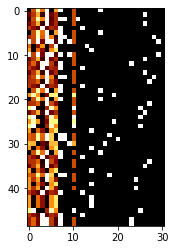

In [21]:
plt.figure()
plt.imshow(mat_1d, cmap='afmhot')
plt.savefig('1d_sequnce.png', dpi=300)

In [15]:
mat_2d = get_mat_2d(seq)

In [ ]:
for i, a in enumerate(seq):
    if a == 'W':
        j = i
mat_2d[j*2].T

In [16]:
s = [255, 255, 0]
n = [0, 0, 255]
o = [255, 0, 0]
h = [0, 0, 0]
c = [50, 50, 50]
r = [1, 1, 1]

In [17]:
cmat = np.array([c, h, n, o, s, r])

In [ ]:
cmat

In [58]:
mat_2d[:,:6,:].reshape(98,36)[14]

array([2., 1., 0., 0., 0., 0., 1., 2., 0., 0., 0., 1., 1., 2., 1., 0., 0.,
       1., 2., 2., 0., 0., 0., 1., 2., 2., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0.])

In [67]:
mat_2d[0,:6,:].shape

(6, 6)

In [ ]:
test = np.arange(6*3).reshape((6,3))

In [ ]:
np.matmul(mat_2d, test).shape

In [18]:
image = np.matmul(mat_2d, cmat)
image = image/image.max()
image_sum = image.sum(axis=2)
for i in range(3):
    image[:,:,i] = np.where(image_sum == 0, 1, image[:,:,i])

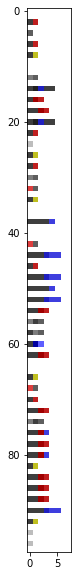

In [23]:
plt.figure(figsize=(5,10))
plt.imshow(image)
plt.savefig('2d_sequnce.png', dpi=300)

In [20]:
seq[:20]

'GSASCGVWDEWSPCSVTCGK'

In [ ]:
mat_2d[0].T

In [ ]:
np.where(image.sum(axis=2) == 0, 1, 0)

In [24]:
all_2d = get_mat_2d(aa_keys.index)

In [26]:
image = np.matmul(all_2d, cmat)
image = image/image.max()
image_sum = image.sum(axis=2)
for i in range(3):
    image[:,:,i] = np.where(image_sum == 0, 1, image[:,:,i])

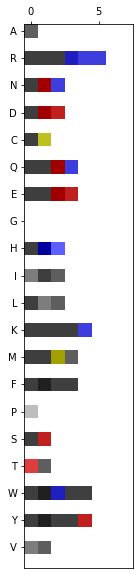

In [68]:
plt.figure(figsize=(5,10))
plt.imshow(image)
plt.yticks(np.arange(20)*2, aa_keys.index)
plt.savefig('2d_all.png', dpi=300)

In [32]:
aa_keys[aa_keys.columns[:11]]

,mass,PI,pka,pkb,pka.1,van der waal volume,Hydrophobicity,hydrophobic,Aliphatic,Aromatic,ph
One Letter,,,,,,,,,,,
A,0.108600,0.399494,0.833333,0.580808,1.000000,0.165217,0.328530,1,1,0,0
R,0.767533,1.000000,0.030303,0.136364,0.327763,0.869565,0.521614,0,0,0,3
N,0.441710,0.323641,0.515152,0.000000,1.000000,0.417391,0.357349,0,0,0,0
D,0.449335,0.000000,0.287879,0.595960,0.000000,0.373913,1.000000,0,0,0,-2
C,0.356817,0.278129,0.181818,1.000000,0.185340,0.330435,0.296830,1,0,0,-2
Q,0.550310,0.353982,0.560606,0.207071,1.000000,0.573913,0.288184,0,0,0,0
E,0.557935,0.037927,0.454545,0.378788,0.022028,0.530435,0.714697,0,0,0,-2
G,0.000000,0.405815,0.833333,0.535354,1.000000,0.000000,0.561960,1,0,0,0
H,0.620071,0.600506,0.000000,0.308081,0.109001,0.608696,0.619597,0,0,1,1


In [34]:
all_1d = get_mat_1d(aa_keys.index, (1,1))

In [36]:
for i in range(all_1d.shape[1]):
    if (all_1d[:,i].max() - all_1d[:,i].min()) == 0:
        all_1d[:,i] = (all_1d[:,i] - all_1d[:,i].min())
    else:
        all_1d[:,i] = (all_1d[:,i] - all_1d[:,i].min())/(all_1d[:,i].max() - all_1d[:,i].min())

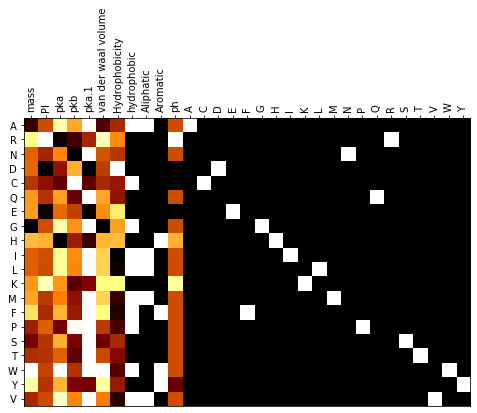

In [63]:
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

plt.figure(figsize=(8,8))
plt.imshow(all_1d, cmap='afmhot')
plt.yticks(np.arange(20), aa_keys.index)
plt.xticks(np.arange(31), aa_keys.columns, rotation=90)
plt.savefig('1d_all.png', dpi=300)